<a href="https://colab.research.google.com/github/Oxirane-git/Multi-Class-Image-Classification./blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-class image classification system that can identify objects across 5 distinct catagories.**


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving Training_set.zip to Training_set.zip
User uploaded file "Training_set.zip" with length 203682975 bytes


In [2]:

!unzip Training_set.zip


Streaming output truncated to the last 5000 lines.
  inflating: Training_set/Dog/1633807559966_Shih Tzu Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807561972_Lion Shepherd Dog for sale.jpg  
  inflating: Training_set/Dog/1633807563645_Labrador Brown Female Puppy for sale.jpg  
  inflating: Training_set/Dog/1633807584093_Terrier puppies for sale.jpg  
  inflating: Training_set/Dog/1633807588650_Pomeranian Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807610793_Goldern Retriever Puppy for sale.jpg  
  inflating: Training_set/Dog/1633807612998_German Shepherd Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807613369_Pomeranian Mix Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807613654_Puppies for Kind Homes for sale.jpg  
  inflating: Training_set/Dog/1633807613901_Dog for Kind Home for sale.jpg  
  inflating: Training_set/Dog/1633807633201_Rottweiler Dog for sale.jpg  
  inflating: Training_set/Dog/1633807634604_German Shepherd Dog for sale.jp

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/Training_set'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10759 images belonging to 5 classes.
Found 1896 images belonging to 5 classes.


In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(5, activation='softmax')  ])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 172s 487ms/step - accuracy: 0.4306 - loss: 1.3596 - val_accuracy: 0.4731 - val_loss: 1.1137
Epoch 2/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 156s 464ms/step - accuracy: 0.4913 - loss: 1.1242 - val_accuracy: 0.5253 - val_loss: 1.0667
Epoch 3/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 159s 473ms/step - accuracy: 0.5204 - loss: 1.0575 - val_accuracy: 0.5248 - val_loss: 1.0661
Epoch 4/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 164s 486ms/step - accuracy: 0.5660 - loss: 1.0223 - val_accuracy: 0.5575 - val_loss: 0.9974
Epoch 5/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 158s 468ms/step - accuracy: 0.5866 - loss: 0.9736 - val_accuracy: 0.5512 - val_loss: 1.0178
Epoch 6/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 157s 465ms/step - accuracy: 0.6280 - loss: 0.8850 - val_accuracy: 0.5359 - val_loss: 1.0056
Epoch 7/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 176s 523ms/step - accuracy: 0.6635 - loss: 0.7966 - val_accuracy: 0.5253 - val_loss: 1.0533


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step
Validation Accuracy: 5.49%
Precision: 14.33%
Recall: 20.53%
F1-Score: 3.43%

Classification Report:

              precision    recall  f1-score   support

        Bird       0.00      0.00      0.00       331
         Cat       0.25      0.00      0.00       638
         Dog       0.44      0.07      0.12       870
        Fish       0.00      0.00      0.00        14
      Rabbit       0.02      0.95      0.05        43

    accuracy                           0.05      1896
   macro avg       0.14      0.21      0.03      1896
weighted avg       0.29      0.05      0.06      1896



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

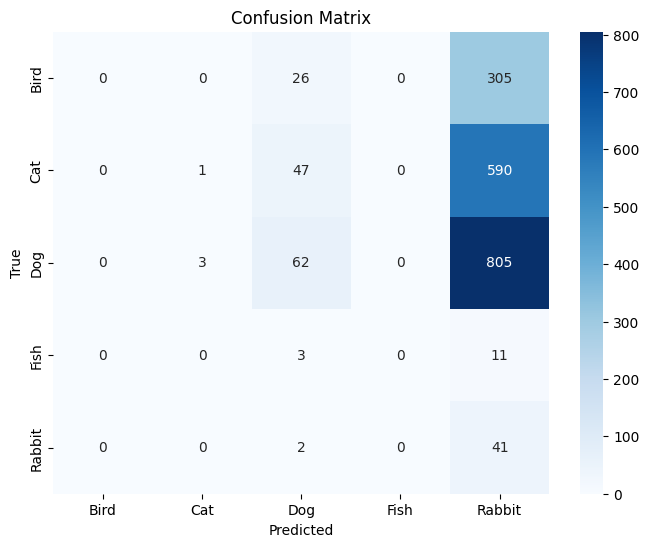

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred = cnn_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = val_generator.classes

accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(val_generator.class_indices.keys()),
            yticklabels=list(val_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


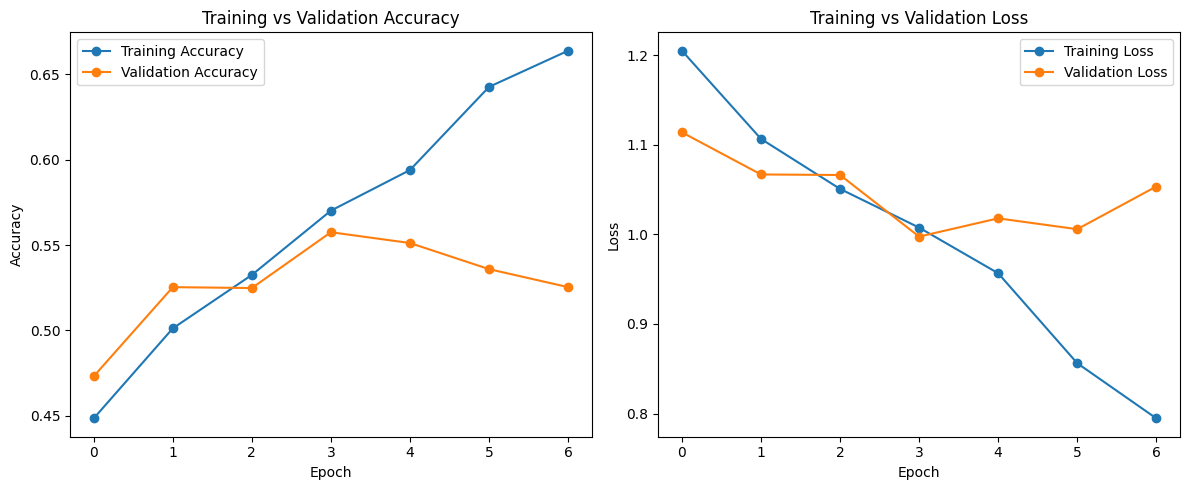

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Training Loss', marker='o')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize

prediction = cnn_model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
class_labels = list(val_generator.class_indices.keys())

print(f"Predicted Class: {class_labels[predicted_class]}")


Saving michael-sum-LEpfefQf4rU-unsplash.jpg to michael-sum-LEpfefQf4rU-unsplash.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Class: Rabbit


## **Initial Misclassification Issue: Model Limitations Without Transfer Learning**

In [28]:
import numpy as np
print("Raw Prediction:", prediction)
print("Predicted Class Index:", np.argmax(prediction))
print("Predicted Class Label:", class_labels[np.argmax(prediction)])


Raw Prediction: [[1.0705513e-03 5.3552329e-04 9.9764293e-01 6.4059836e-04 1.1032930e-04]]
Predicted Class Index: 2
Predicted Class Label: Dog


In [29]:
print(val_generator.class_indices)


{'Bird': 0, 'Cat': 1, 'Dog': 2, 'Fish': 3, 'Rabbit': 4}


In [ ]:
import os
import shutil
import random
from tqdm import tqdm

# Define paths
original_dataset_dir = '/content/data'  # original unstructured dataset
base_dir = '/content/split_data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create folders
for split_dir in [train_dir, val_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)

# Go through each class and split its images
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)
        n_total = len(images)
        n_train = int(0.7 * n_total)
        n_val = int(0.15 * n_total)

        # Paths for each subset
        for subset, subset_dir, start, end in [
            ('train', train_dir, 0, n_train),
            ('val', val_dir, n_train, n_train + n_val),
            ('test', test_dir, n_train + n_val, n_total)
        ]:
            subset_class_dir = os.path.join(subset_dir, class_name)
            os.makedirs(subset_class_dir, exist_ok=True)
            for img in images[start:end]:
                shutil.copy(os.path.join(class_path, img), os.path.join(subset_class_dir, img))


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/split_data/train', target_size=(224, 224), batch_size=32, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/split_data/val', target_size=(224, 224), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/split_data/test', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)


In [30]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(5, activation='softmax')  # Adjust based on your actual class count
])


In [31]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [32]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers


In [33]:
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(5, activation='softmax')  # Change '5' to match your number of classes
])


In [34]:
transfer_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_transfer = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 166s 468ms/step - accuracy: 0.5144 - loss: 1.2952 - val_accuracy: 0.7257 - val_loss: 0.7110
Epoch 2/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 157s 466ms/step - accuracy: 0.8422 - loss: 0.4801 - val_accuracy: 0.7758 - val_loss: 0.6226
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 161s 477ms/step - accuracy: 0.8823 - loss: 0.3669 - val_accuracy: 0.7969 - val_loss: 0.5877
Epoch 4/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 155s 460ms/step - accuracy: 0.9006 - loss: 0.3119 - val_accuracy: 0.8149 - val_loss: 0.5397
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 156s 462ms/step - accuracy: 0.9117 - loss: 0.2671 - val_accuracy: 0.8154 - val_loss: 0.5284
Epoch 6/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 156s 463ms/step - accuracy: 0.9147 - loss: 0.2590 - val_accuracy: 0.8302 - val_loss: 0.5020
Epoch 7/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 156s 462ms/step - accuracy: 0.9262 - loss: 0.2328 - val_accuracy: 0.8328 - val_loss: 0.4845
Epoch 8/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 155s 459ms/step - accuracy: 0.9202 -

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get true labels and predictions
Y_pred = transfer_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Transfer Learning Model')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Training Loss', marker='o')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
loss, accuracy = transfer_model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 388ms/step - accuracy: 0.0841 - loss: 2.7342
Validation Accuracy: 8.44%


In [37]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np

# Upload image from your device
uploaded = files.upload()

# Predict using transfer model
for file_name in uploaded.keys():
    img_path = file_name

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = transfer_model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
class_labels = list(val_generator.class_indices.keys())

print(f"Predicted Class: {class_labels[predicted_class]}")

# Optional: Show all class probabilities
for i, prob in enumerate(prediction[0]):
    print(f"{class_labels[i]}: {prob:.4f}")


Saving 220325case013.jpg to 220325case013.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: Fish
Bird: 0.1083
Cat: 0.1604
Dog: 0.1384
Fish: 0.5491
Rabbit: 0.0437
